   # Pytorch Linear Regression
   This tutorial is based on https://github.com/yunjey/pytorch-tutorial

In [33]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [34]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.001

In [35]:
# sample dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

x_train.shape,y_train.shape

((15, 1), (15, 1))

In [36]:
# Linear regression model
model = nn.Linear(input_size, output_size)

In [37]:
# Mean Square Loss(MSE) function 
criterion = nn.MSELoss()
# Stochastic gradient descent(SGD) optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [38]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Save the model checkpoint
#torch.save(model.state_dict(), 'model.ckpt')

Epoch [10/100], Loss: 3.4260
Epoch [20/100], Loss: 0.7758
Epoch [30/100], Loss: 0.3405
Epoch [40/100], Loss: 0.2687
Epoch [50/100], Loss: 0.2565
Epoch [60/100], Loss: 0.2541
Epoch [70/100], Loss: 0.2534
Epoch [80/100], Loss: 0.2529
Epoch [90/100], Loss: 0.2525
Epoch [100/100], Loss: 0.2520


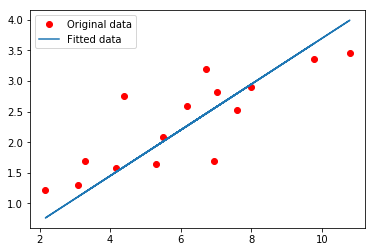

In [40]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted,label='Fitted data')
plt.legend()
plt.show()
